<a href="https://colab.research.google.com/github/ManasviAtGitHub/pytorch_deep_learning/blob/main/PyTorch_04_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Computer Vision

### Computer vision libraries in PyTorch
* torchvision : base domain library for PyTorch computer vision
* torchvision.datasets : get datasets and data loading functins for computer vision
* torchvision.models - get pretrained computer vision models that you can leverage for your own problems
* torchvision.transforms - functions for manipulation your vision data to be suitable for use with an ML model
* torch.utils.data.Dataset - base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


### Getting dataset

In [2]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = True, # do we want the training dataset ?
    download = True, # do we want to download yes/no ?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data ?
    target_transform = None # how do we want to transform the labels/targets ?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None

)

100%|██████████| 26421880/26421880 [00:01<00:00, 19015290.28it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 344147.12it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6265700.91it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15958815.22it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# check the shape of our image
print(f"Image shape : {image.shape} -> [C, H, W]")
print(f"Image label : {class_names[label]}")

Image shape : torch.Size([1, 28, 28]) -> [C, H, W]
Image label : Ankle boot


Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

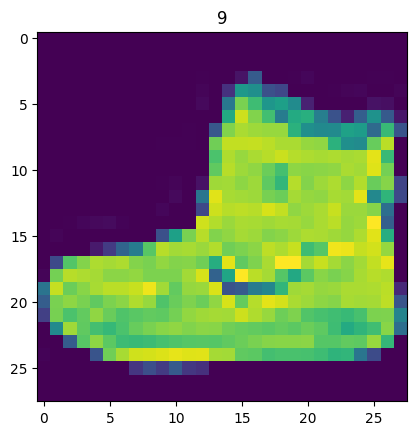

In [9]:
# visualizing our data
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

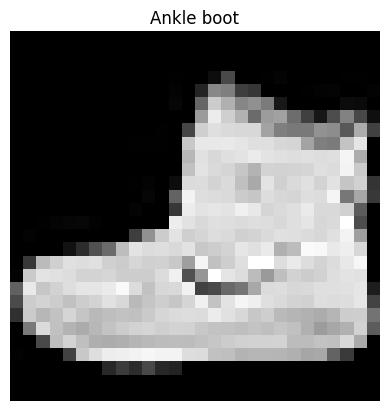

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

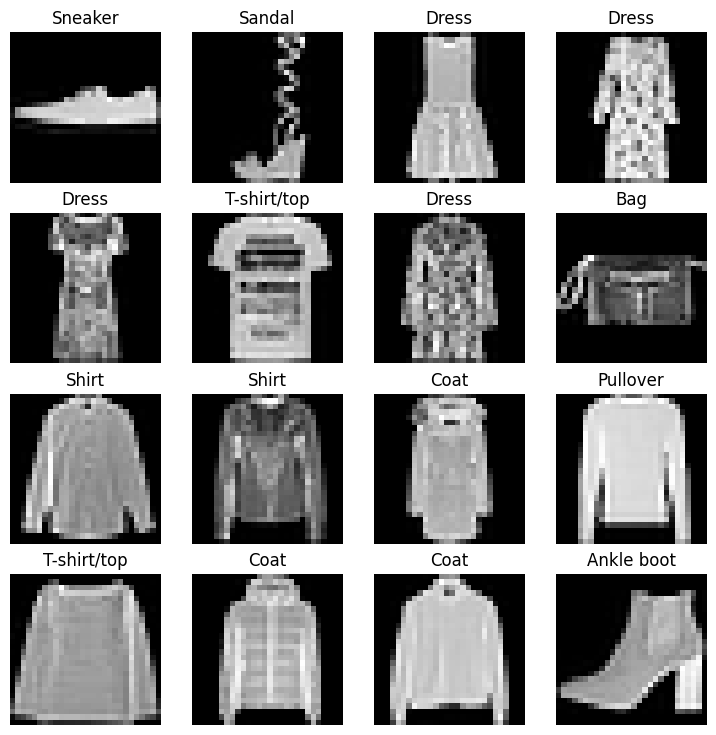

In [11]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare dataloader
Dataloader turns our dataset into a python iterable.

More specifically, we want to turn our data into batches (or mini batches).
Why would we do this ?
* It is more computationally efficient, as in your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32)

* It gives our neural network more chances to update its gradients per epoch

In [14]:
from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle =True)

test_dataloader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle=False)


# let's check what we have created

print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader : {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length of test_dataloader : {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7998ab167b50>, <torch.utils.data.dataloader.DataLoader object at 0x7998ab166710>)
Length of train_dataloader : 1875 batches of 32 ...
Length of test_dataloader : 313 batches of 32 ...


In [16]:
# check out what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 8, label size : torch.Size([])


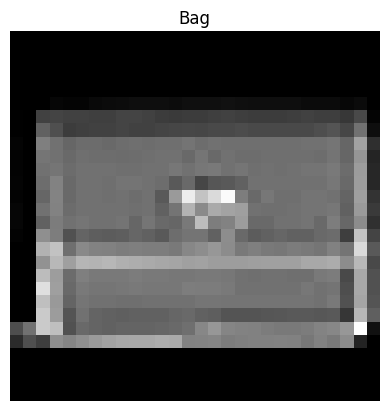

In [21]:
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label}, label size : {label.shape}")

### MODEL 0 : Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsquent models/experiments.

In other words : start simply and add complexity when necessary

In [22]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output = flatten_model(x) # perform the forward pass

# print what happened
print(f"Shape before flattening : {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening : {output.shape} -> [color_channels, height*width]")

Shape before flattening : torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening : torch.Size([1, 784]) -> [color_channels, height*width]


In [26]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [27]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28 * 28,
    hidden_units = 10,
    output_shape = len(class_names)
)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [28]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [29]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

Setup, loss, optimizer and evaluation metrics
* Loss function : since we're working with multi-class data, our loss function wil be nn.CrossEntropyLoss()
* Optimizer : our optimizer torch.optim.SGD()
* Evaluation metric : since we're working on a classification problem, let's use accuracy as our evaluation metric

In [30]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [33]:
# Import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.1)

Create a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
  1. Model's performance (loss and accuracy values etc)
  2. How fast it runs

In [34]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  """ Prints difference between start and end time """
  total_time = end - start
  print(f"Train time on {device} : {total_time : .3f} secs")
  return total_time


In [36]:
start_time = timer()
# some code ..
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu :  0.000 secs


4.5230999603518285e-05

Creating a training loop and training a model on batches of data

* Loop through epochs.
* Loop through training batches, perform training steps, calculate the train loss per batch.
* Loop through testing batches, perform testing steps, calculate the test loss per batch.
* Print out what's happening.
* Time it all(for fun)

Note : Because we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.

In [37]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n ---- ")
  ### training
  train_loss = 0

  # add a loop to loop through the training batches
  for batch, (X,y) in enumerate (train_dataloader):
    model_0.train()

    # forward pass
    y_pred = model_0(X)

    # calculate losss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accummulate train loss

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # optimizer step (update the model's parameters once *per batch*)
    optimizer.step()

    # print out what's happening

    if batch%400 == 0:
      print(f"loooked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### testing

  test_loss, test_acc = 0, 0

  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # forward pass
      test_pred = model_0(X_test)

      # calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # calculate accuracy
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim = 1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\n Train loss : {train_loss: .4f} | Test loss : {test_loss:.4f}, Test acc : {test_acc:.4f}")


# calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.5904 | Test loss : 0.5095, Test acc : 82.0387
Epoch : 1
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.4763 | Test loss : 0.4799, Test acc : 83.1969
Epoch : 2
 ---- 
loooked at 0/60000 samples.
loooked at 12800/60000 samples.
loooked at 25600/60000 samples.
loooked at 38400/60000 samples.
loooked at 51200/60000 samples.

 Train loss :  0.4550 | Test loss : 0.4766, Test acc : 83.4265
Train time on cpu :  42.387 secs


### Make predictions and get Model 0 results

In [38]:
torch.manual_seed(42)

def eval_model(model : torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):

  """ Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    # scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name" : model.__class__.__name__,
          "model_loss" : loss.item(),
          "model_acc" : acc
          }


In [39]:
# calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}